# me 05 Homework 001

### Install PipENV

In [1]:
!python --version

Python 3.9.13


In [2]:
import os
import sys
os.path.dirname(sys.executable)

'C:\\Users\\alain\\miniconda3\\envs\\mlzc'

In [3]:
#!pip install pipenv

In [4]:
!pipenv --version

pipenv, version 2022.7.4



### Q1 = pipenv, version 2022.9.24

#  install Scikit-Learn version 1.0.2 (with pipenv)

In [33]:
!pipenv --where

C:\Users\alain\Documents\prv\IT\mlzc\jupyter



In [37]:
#!pipenv install scikit-learn==1.0.2

In [7]:
!pipenv --venv

C:\Users\alain\.virtualenvs\jupyter-aSo0EjoE



In [8]:
filLck = 'Pipfile.lock'

with open(filLck) as fil:
    filTxt = fil.read()
    print(filTxt[:2500])  

{
    "_meta": {
        "hash": {
            "sha256": "cde4ebbb92f751b179709139ec54dbff122291b60738db5d879459e3b8acea3d"
        },
        "pipfile-spec": 6,
        "requires": {
            "python_version": "3.9"
        },
        "sources": [
            {
                "name": "pypi",
                "url": "https://pypi.org/simple",
                "verify_ssl": true
            }
        ]
    },
    "default": {
        "click": {
            "hashes": [
                "sha256:7682dc8afb30297001674575ea00d1814d808d6a36af415a82bd481d37ba7b8e",
                "sha256:bb4d8133cb15a609f44e8213d9b391b0809795062913b383c62be0ee95b1db48"
            ],
            "markers": "python_version >= '3.7'",
            "version": "==8.1.3"
        },
        "colorama": {
            "hashes": [
                "sha256:854bf444933e37f5824ae7bfc1e98d5bce2ebe4160d46b5edf346a89358e99da",
                "sha256:e6c6b4334fc50988a639d9b98aa429a0b57da6e17b9a44f0451f930b6967b7a4"
         

In [9]:
posBeg = filTxt.find('"scikit-learn"')
posBeg

9275

In [10]:
posEnd = filTxt.find(',' , posBeg)
posEnd

9406

In [11]:
print(filTxt[posBeg:posEnd])

"scikit-learn": {
            "hashes": [
                "sha256:08ef968f6b72033c16c479c966bf37ccd49b06ea91b765e1cc27afefe723920b"


### Q2 = "sha256:08ef968f6b72033c16c479c966bf37ccd49b06ea91b765e1cc27afefe723920b"

# Q3 : Pickle 

In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [13]:
import pickle

In [14]:
# re-Load dicVectorizer
filDvt = 'dv.bin'
with open(filDvt, 'rb') as fil: 
    dvt = pickle.load(fil)
dvt

C:\Users\alain\miniconda3\envs\mlzc\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DictVectorizer from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


DictVectorizer(sparse=False)

In [15]:
# re-Load Model
filMod = 'model1.bin'
with open(filMod, 'rb') as fil: 
    modLor = pickle.load(fil)
modLor

C:\Users\alain\miniconda3\envs\mlzc\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


LogisticRegression(solver='liblinear')

In [16]:
dicCli = {"reports": 0, "share": 0.001694, "expenditure": 0.12, "owner": "yes"}
dicCli

{'reports': 0, 'share': 0.001694, 'expenditure': 0.12, 'owner': 'yes'}

In [17]:
X_Cli = dvt.transform([dicCli])
X_Cli

array([[0.12    , 0.      , 1.      , 0.      , 0.001694]])

In [18]:
y_prdCli = modLor.predict_proba(X_Cli)[0, 1]
y_prdCli.round(3)

0.162

# Q3 = 0.162

# Q4 Flask

In [46]:
#!pip install flask

In [20]:
from flask import Flask

# Test install with "coucou" application

<div class="alert alert-block alert-danger">
<b>Not working:</b> Seems running Flask inside Jupyter is not working.
<p>I had to go the the virtual env (using miniconda sheel) and run it as
<p><code>> python coucou.py</code>  
<p>from there.
</div>

In [21]:
# app = Flask('coucou')

# @app.route('/coucou', methods=['GET'])
# def coucou():
#     return "Flask say COUCOU to you"

# if __name__ == "__main__":
#     app.run(debug=True, host='0.0.0.0', port=9696)

### Test de "coucou.py"


In [22]:
import requests

In [41]:
strUrl = 'http://localhost:9696/coucou'

In [42]:
resGet = requests.get(strUrl)

In [43]:
print('> resGet.status_code =' , resGet.status_code )
print('> resGet.content     =' , resGet.content )
print('> resGet.encoding    =' , resGet.encoding )
print('> resGet.headers     =' , resGet.headers )
print('> resGet.text        =' , resGet.text )

> resGet.status_code = 200
> resGet.content     = b'Flask say COUCOU to you'
> resGet.encoding    = utf-8
> resGet.headers     = {'Server': 'Werkzeug/2.2.2 Python/3.9.13', 'Date': 'Thu, 06 Oct 2022 14:57:17 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Content-Length': '23', 'Connection': 'close'}
> resGet.text        = Flask say COUCOU to you


# Q4: prediction

In [1]:
import requests
import json

In [4]:
"""customer =  {"reports": 0, 
             "share": 0.001694, 
             "expenditure": 0.12, 
             "owner": "yes"}
"""
customer =  {"reports": 0,
             "share": 0.245, 
             "expenditure": 3.438, 
             "owner": "yes"}

In [5]:
url = 'http://localhost:9696/predict'
response = requests.post(url, json=customer)
result = response.json()

print(json.dumps(result, indent=2))

{
  "card": true,
  "card_probability": 0.9282218018527452
}


# Q4 = 0.9282218018527452
<code>
{
  "card": true,
  "card_probability": 0.9282218018527452
}

### Run with waitress-serve
<code>
> conda activate mlzc  (If conda !!!!)
> pipenv shell
> waitress-serve --listen=0.0.0.0:9696 predict:app
</code>

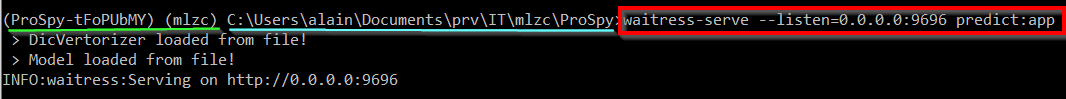

# Q5: Docker and image

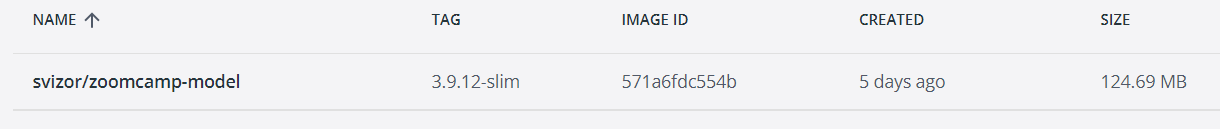

### Q5  Size = 124.69 MB

# Q6: Docker

<div class="alert alert-block alert-danger">
<p>Modified filename of model in predict.py : model*1* -> model*2*
</div>

In Notepad: File name must be ***Dockerfile*** (no extension)

```
FROM svizor/zoomcamp-model:3.9.12-slim

RUN pip install pipenv
COPY ["Pipfile", "Pipfile.lock", "./"]
RUN pipenv install --system --deploy

COPY ["predict.py" , "./"]

EXPOSE 9696

ENTRYPOINT ["waitress-serve", "--listen=0.0.0.0:9696", "predict:app"]   
```

<div class="alert alert-block alert-danger">
<p>Recreated a clean new python with clean Env WITHOUT conda !!!
<p><b>C:\Users\alain\Documents\prv\IT\mlzc\ProNoCnd    
</div>

In Win CMD:

<code>
> cd C:\Users\alain\Documents\prv\IT\mlzc\ProNoCnd
> docker build -t card-prediction-alain .
> docker run -it -p 9696:9696 card-prediction-alain:latest    
    
</code>

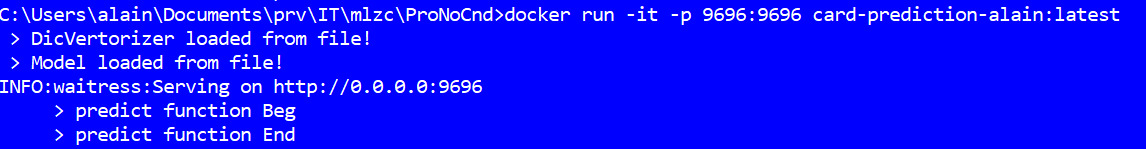

### python 
> test_predict.py (in pipenv)

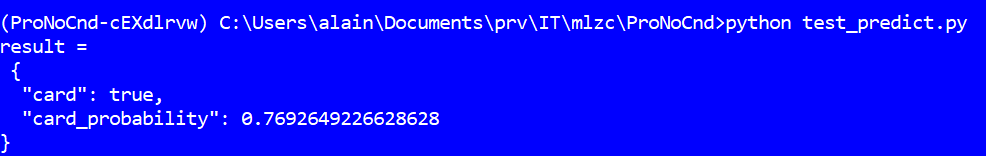

## Q6 = 0.76926